# PHYS 481 Assignment 6: Random Walks

### Author 1 (30114124) Aki
### Author 2 (30133483) Yuwan
### Author 3 (30154399) Christian
### Author 4 (30133957) Hayden

## Introduction

This assignment is to analyze random walks normalized displacements through Brownian motion (both theoretical and realistic) for a number of trials. We modify the step distance/length, in addition compare our results with the analytical probability using the Central Limit Theorem.   

In [1]:
# Load standard libraries for numerical methods and plotting.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## Q1

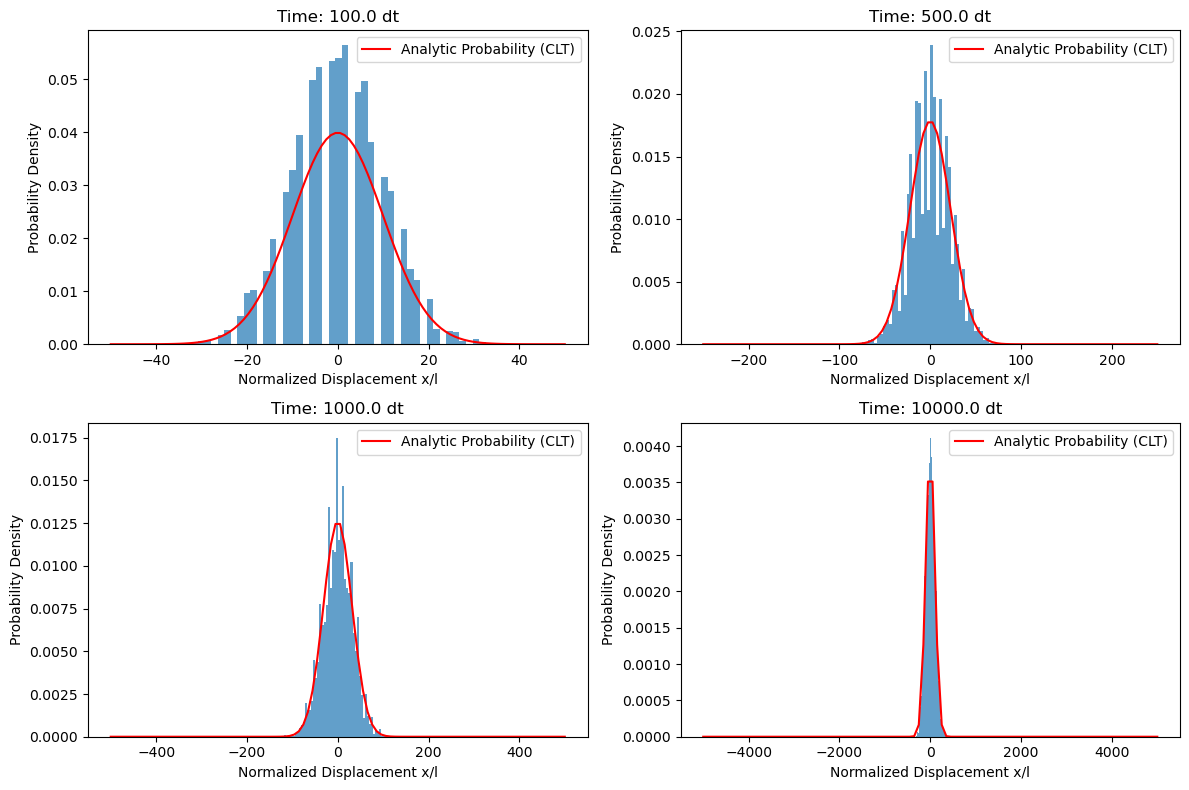

In [79]:
def random_walks(trials, dt, length):  # num_trials, num_steps, step_length 
    '''
    Simulate random walks and return the normalized displacements.
    
    Parameters:
        trials: Number of trials
        num_steps: List of time intervals
        length: Length of each step
        right: Probability of moving right
    Returns:
        normalized_displacements: Array of normalized displacements
    '''
    # initialize an array to store normalized displacements
    normalized_displacements = np.zeros((len(dt), trials))  # rows, column 
    
    # simulate the random walks
    for i, dt_current in enumerate(dt):  # enumerate access both index and element in the loop
        for j in range(trials):
            # simulate a random walk for the current time interval
            positions = np.random.choice([-length, length], size=dt_current)  # randomly steps left or right, size determined by time interval dt
            normalized_displacement = np.sum(positions) / (length )  # overall normalize displacement from positions array
            normalized_displacements[i, j] = normalized_displacement  # place normalized displacement x/l in the current row and column 
        # print(normalized_displacement)
    return normalized_displacements


# set the parameters
num_trials = 5000  # number of trials
num_steps = [100, 500, 1000, 10000]  # time intervals dt
step_length = 1.0  # length of each step

# obtain random walks
normalized_displacements = random_walks(num_trials, num_steps, step_length)

# create histograms and plot them
plt.figure(figsize=(12, 8))
for i, num_steps_current in enumerate(num_steps):
    plt.subplot(2, 2, i + 1)
    plt.hist(normalized_displacements[i], bins=50, density=True, alpha=0.7)
    plt.title(f'Time: {num_steps_current * step_length} dt')
    plt.xlabel("Normalized Displacement x/l")
    plt.ylabel("Probability Density")

    # calculate mean and standard deviation based on provided formulas
    N = num_steps_current
    q = 0.5  # probability of moving left or right is 0.5 for a simple random walk
    mean = N * step_length * (2*q - 1)
    std_dev = 2 * step_length * np.sqrt(N * q * (1 - q))
    x = np.linspace(-0.5*num_steps_current, 0.5*num_steps_current, 100) # generate x values for the Gaussian distribution#this needs to be in the for loop
    
    # calculate the probability density function using the provided formula
    px = (1 / np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-1*(x - mean)**2 / (2 * std_dev**2))
    
    # overlay the Gaussian distribution on the histogram
    plt.plot(x, px, 'r', label="Analytic Probability (CLT)")
    plt.legend()  # display legend

plt.tight_layout()  # makes the subplots equally placed
plt.show()

Between all dt, the width distribution is accurate with the analytical. Thus, we can be confident in the distribution of our random walks. Only thing that's concerning is the height/central position goes over the analytical. The smaller the time step, the more the central position overlaps the analytical. In addition, the larger the time step, the narrower the width and the sharper the height becomes. But it is an increase in both probability density and normalized displacement which is expected. Overall, these plots are still good. 

## Q2

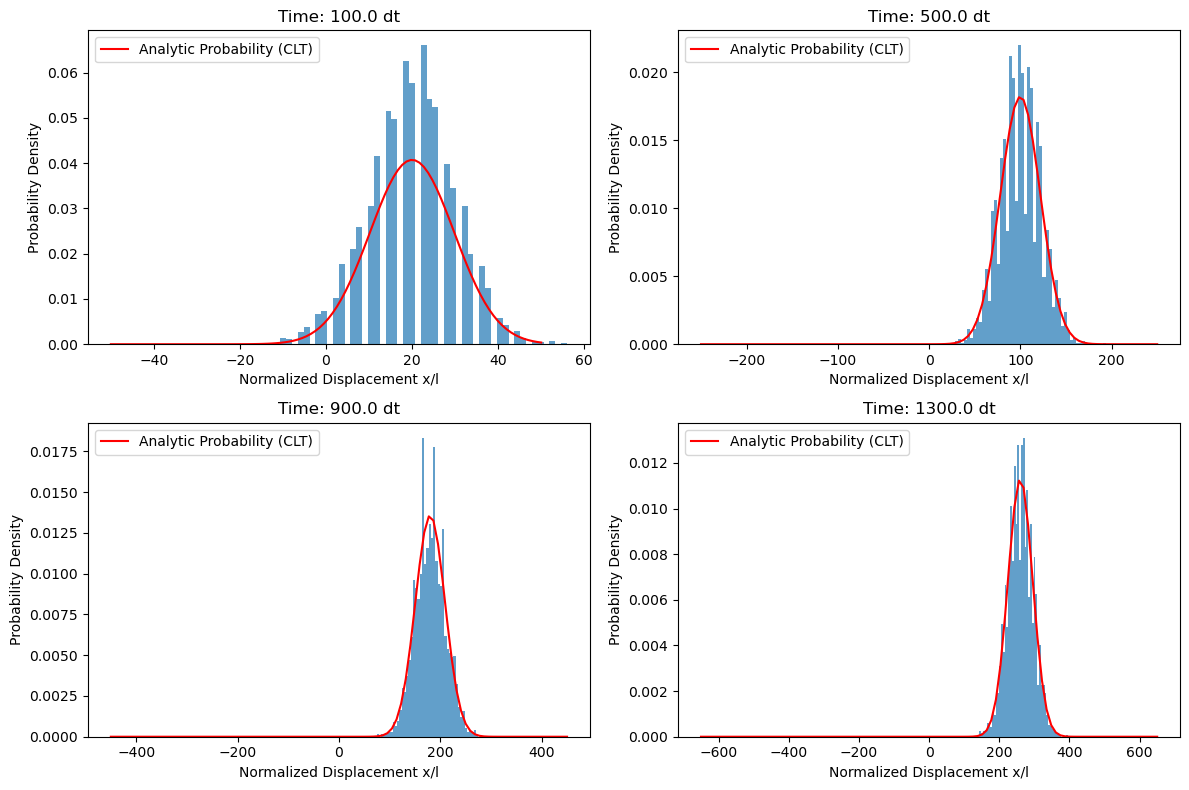

In [78]:
def random_walks(trials, dt, length, right):  # num_trials, num_steps, step_length 
    '''
    Simulate random walks and return the normalized displacements.
    
    Parameters:
        trials: Number of trials
        num_steps: List of time intervals
        length: Length of each step
        right: Probability of moving right
    Returns:
        normalized_displacements: Array of normalized displacements
    '''
    # initialize an array to store normalized displacements
    normalized_displacements = np.zeros((len(dt), trials))  # rows, column 
    
    # simulate the random walks
    for i, dt_current in enumerate(dt):  # enumerate access both index and element in the loop
        for j in range(trials):
            # simulate a random walk for the current time interval
            positions = np.random.choice([-length, length], size=dt_current, p=[1 - right, right])  # randomly steps left or right, size determined by time interval dt
            normalized_displacement = np.sum(positions) / (length)  # overall normalize displacement from positions array
            normalized_displacements[i, j] = normalized_displacement  # place normalized displacement x/l in the current row and column 

    return normalized_displacements


# set the parameters
num_trials = 5000  # number of trials
num_steps = [100, 500, 900, 1300]  # time intervals dt
step_length = 1.0  # length of each step
p_right = 0.6

# obtain random walks
normalized_displacements = random_walks(num_trials, num_steps, step_length, p_right)

# create histograms and plot them
plt.figure(figsize=(12, 8))
for i, num_steps_current in enumerate(num_steps):
    plt.subplot(2, 2, i + 1)
    plt.hist(normalized_displacements[i], bins=50, density=True, alpha=0.7)
    plt.title(f'Time: {num_steps_current * step_length} dt')
    plt.xlabel("Normalized Displacement x/l")
    plt.ylabel("Probability Density")

    # calculate mean and standard deviation based on provided formulas
    N = num_steps_current
    q = 0.6 # probability of moving left or right is 0.5 for a simple random walk
    mean = N * step_length * (2 * q - 1)
    std_dev = 2 * step_length * np.sqrt(N * q * (1 - q))
    x = np.linspace(-0.5*num_steps_current, 0.5*num_steps_current, 100) # generate x values for the Gaussian distribution
    
    # calculate the probability density function using the provided formula
    px = (1 / np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-1*(x - mean)**2 / (2 * std_dev**2))
    
    # overlay the Gaussian distribution on the histogram
    plt.plot(x, px, 'r', label="Analytic Probability (CLT)")
    plt.legend()  # display legend

plt.tight_layout()  # makes the subplots equally placed
plt.show()

This is the same plot but normalized displacements are shifted slightly to the right, because the porbability of moving to the right is 60 percent. There is minimal change in terms of the width and central position from the first question. This could describe the random movement of fluid particles like water as a result of collisions with surrounding molecules. 

## Q3

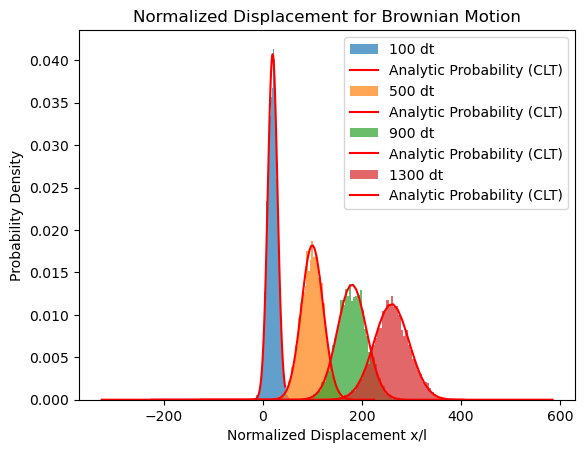

In [56]:
# parameters
l = 5
mu = 0.2 * l
sigma = 1.0 * l
num_steps = 1301
num_trials = 5000
dt = 1

#cumsum gives us a running tally at every dt 
#np.random.normal takes random samples from guassian distribution with parameters we pass in
displacements = np.cumsum(np.random.normal(mu*dt, sigma*np.sqrt(dt), size=(num_trials, num_steps)), axis=1)

time_steps = [100, 500, 900, 1300]

# Normalize
normalized_displacements = displacements[:, time_steps] / l

# Plot histograms
for i, time_step in enumerate(time_steps):
    plt.hist(normalized_displacements[:, i], bins=50, density=True, alpha=0.7, label=f'{time_step} dt')

    # calculate mean and standard deviation based on provided formulas
    N = time_step
    q = 0.6  # probability of moving left or right is 0.5 for a simple random walk
    mean = N * dt * (2*q - 1)
    std_dev = 2 * dt * np.sqrt(N * q * (1 - q))
    x = np.linspace(-0.25*time_step, 0.45*time_step, 100) # generate x values for the Gaussian distribution#this needs to be in the for loop
    
    # calculate the probability density function using the provided formula
    px = (1 / np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-1*(x - mean)**2 / (2 * std_dev**2))
    
    # overlay the Gaussian distribution on the histogram
    plt.plot(x, px, 'r', label="Analytic Probability (CLT)")
    plt.legend()  # display legendd
    

# Add labels and legend
plt.title('Normalized Displacement for Brownian Motion')
plt.xlabel('Normalized Displacement x/l')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

The normalized displacements are more accurate with its analytical counterparts. The width and height distributions behave more accurately within the the analytical probability. We can see in the above figure that as time progresses, the central position shifts to the right due to the bias of the $\mu$ value. As time progresses we can also see that the distributions become wider and lose height on the probability density axis. In this case we are seeing both convection and diffusion. The diffusion occurs due to the increase in time steps which correspond to N values. The convection occurs due to the $\mu = 0.2l$ meaning that the mean of the gaussian is centered at 0.2. This means that for every time step we should expect a shift right by 0.2 length units.

## Q4

Mean of step lengths: 0.2054511776372983
Variance of step lengths: 0.1415371057799719


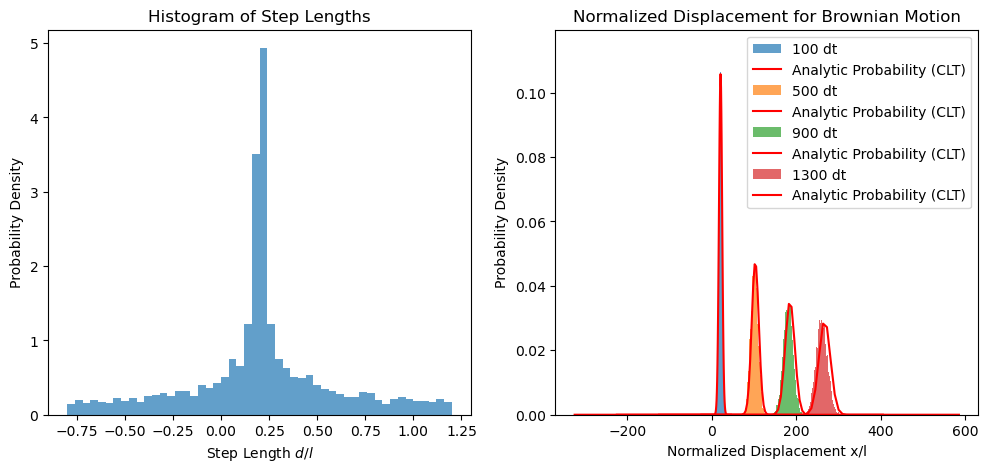

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
l = 1
mu = 0.2 * l
sigma = 1.0 * l
num_steps = 1301
num_trials = 5000
dt = 1

# function for generating step lengths
def step_distance_function(num_trials, num_steps):
    u = np.random.uniform(0, 1, size=(num_trials, num_steps))
    return (2*u - 1)**3 + 0.2

# generates step lengths for histogram
def step_distance_function_hist(num_trials):
    u = np.random.uniform(0, 1, num_trials)
    return (2*u - 1)**3 + 0.2

# generate step lengths
step_lengths = step_distance_function_hist(num_trials)

# plot histogram of step lengths
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(step_lengths, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Step Lengths')
plt.xlabel('Step Length $d/l$')
plt.ylabel('Probability Density')

# calculate mean and variance
mean_step_length = np.mean(step_lengths)
variance_step_length = np.var(step_lengths)

print(f'Mean of step lengths: {mean_step_length}')
print(f'Variance of step lengths: {variance_step_length}')

#cumsum gives us a running tally at every dt 
#np.random.normal takes random samples from guassian distribution with parameters we pass in

# THIS LINE WAS REPLACED WITH THE LINE BELOW IT
#displacements = np.cumsum(np.random.normal(mu*dt, sigma*np.sqrt(dt), size=(num_trials, num_steps)), axis=1)
displacements = np.cumsum(step_distance_function(num_trials, num_steps), axis=1)


# time step
time_steps = [100, 500, 900, 1300]

# normalize
normalized_displacements = displacements[:, time_steps] / l

# plot histograms
plt.subplot(1, 2, 2)
for i, time_step in enumerate(time_steps):
    plt.hist(normalized_displacements[:, i], bins=50, density=True, alpha=0.7, label=f'{time_step} dt')

    # calculate mean and variance based on the provided formula
    N = time_step
    q = mean_step_length
    mean = N * dt * q


    # CHANGED THE LINE BELOW TO THE ORIGINAL CALCULATION OF STDEV
    std_dev = np.sqrt(N * variance_step_length * dt) 
    x = np.linspace(-0.25*time_step, 0.45*time_step, 100)
    
    # calculate the probability density function using the provided formula
    px = (1 / np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-1*(x - mean)**2 / (2 * std_dev**2))
    px = (1 / np.sqrt(2 * np.pi * std_dev**2)) * np.exp(-1*(x - mean)**2 / (2 * std_dev**2))
    
    # overlay the Gaussian distribution on the histogram
    plt.plot(x, px, 'r', label="Analytic Probability (CLT)")    
    
# add labels and legend
plt.title('Normalized Displacement for Brownian Motion')
plt.xlabel('Normalized Displacement x/l')
plt.ylabel('Probability Density')
plt.legend()

# show the plot
plt.show()

In the Histogram of Step Lengths figure, we can see that the mean is again centered around 0.2. This again leads to convection in our Normalized Displacement figure. Comparing the Normalized Displacement figure from q4 to the one from q3, we can see that the conditions of the step distribution do not have a large impact on the convection of the function, but it does impact the probability densities corresponding to each time slice. The probability densities in q4 peak out at much higher values than seen in q3.

## Conclusion

For Q1 and Q2, all dt's width distribution is accurate with the analytical. Thus, we can be confident in the distribution of our random walks. The height/central position goes over the analytical with the smaller time steps. In addition, the larger the time step, the narrower the width and the sharper the height becomes. Q2 has the probability of moving to the right at 60 percent than the standard 50 percent, thus shifting the displacements to the more to the right. For Q3, the central position shifts to the right due to the bias of the $\mu$ value. As time progresses we can also see that the distributions become wider and lose height on the probability density axis. In this case we are seeing both convection and diffusion. The diffusion occurs due to the increase in time steps which correspond to N values. The convection occurs due to the $\mu = 0.2l$ meaning that the mean of the gaussian is centered at 0.2. This means that for every time step we should expect a shift right by 0.2 length units. Finally for Q4, we can see that the conditions of the step distribution do not have a large impact on the convection of the function, but it does impact the probability densities corresponding to each time slice. The probability densities in q4 peak out at much higher values than seen in q3.